In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

In [ ]:
df = pd.read_csv('/content/BTC-Hourly.csv')

In [ ]:
df = df.set_index('unix')

In [ ]:
df

,date,symbol,open,high,low,close,Volume BTC,Volume USD
unix,,,,,,,,
1646092800,2022-03-01 00:00:00,BTC/USD,43221.71,43626.49,43185.48,43312.27,5.205632e+01,2.254677e+06
1646089200,2022-02-28 23:00:00,BTC/USD,43085.30,43364.81,42892.37,43178.98,1.068161e+02,4.612210e+06
1646085600,2022-02-28 22:00:00,BTC/USD,41657.23,44256.08,41650.29,42907.32,5.275406e+02,2.263535e+07
1646082000,2022-02-28 21:00:00,BTC/USD,41917.09,41917.09,41542.60,41659.53,6.975168e+01,2.905822e+06
1646078400,2022-02-28 20:00:00,BTC/USD,41361.99,41971.00,41284.11,41914.97,2.471517e+02,1.035935e+07
...,...,...,...,...,...,...,...,...
1526378400,2018-05-15 10:00:00,BTC/USD,8708.32,8865.00,8695.11,8795.90,1.110127e+07,1.260690e+03
1526374800,2018-05-15 09:00:00,BTC/USD,8728.49,8754.40,8701.35,8708.32,1.593992e+06,1.826200e+02
1526371200,2018-05-15 08:00:00,BTC/USD,8739.00,8750.27,8660.53,8728.49,7.986063e+06,9.177900e+02


In [ ]:
df = df.sort_index(ascending=True)

In [ ]:
df

,date,symbol,open,high,low,close,Volume BTC,Volume USD
unix,,,,,,,,
1526364000,2018-05-15 06:00:00,BTC/USD,8733.86,8796.68,8707.28,8740.99,4.906603e+06,5.599300e+02
1526367600,2018-05-15 07:00:00,BTC/USD,8740.99,8766.00,8721.11,8739.00,2.390399e+06,2.735800e+02
1526371200,2018-05-15 08:00:00,BTC/USD,8739.00,8750.27,8660.53,8728.49,7.986063e+06,9.177900e+02
1526374800,2018-05-15 09:00:00,BTC/USD,8728.49,8754.40,8701.35,8708.32,1.593992e+06,1.826200e+02
1526378400,2018-05-15 10:00:00,BTC/USD,8708.32,8865.00,8695.11,8795.90,1.110127e+07,1.260690e+03
...,...,...,...,...,...,...,...,...
1646078400,2022-02-28 20:00:00,BTC/USD,41361.99,41971.00,41284.11,41914.97,2.471517e+02,1.035935e+07
1646082000,2022-02-28 21:00:00,BTC/USD,41917.09,41917.09,41542.60,41659.53,6.975168e+01,2.905822e+06
1646085600,2022-02-28 22:00:00,BTC/USD,41657.23,44256.08,41650.29,42907.32,5.275406e+02,2.263535e+07


In [ ]:
df = df[['date', 'close']].dropna()

In [ ]:
df

,date,close
unix,,
1526364000,2018-05-15 06:00:00,8740.99
1526367600,2018-05-15 07:00:00,8739.00
1526371200,2018-05-15 08:00:00,8728.49
1526374800,2018-05-15 09:00:00,8708.32
1526378400,2018-05-15 10:00:00,8795.90
...,...,...
1646078400,2022-02-28 20:00:00,41914.97
1646082000,2022-02-28 21:00:00,41659.53
1646085600,2022-02-28 22:00:00,42907.32


In [ ]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')

In [ ]:
def train_forest(df, split_point):
  train_features = df.drop(['close'], axis = 1).head(len(df)-split_point)
  train_labels = df['close'].head(len(df)-split_point)
  val_features = df.drop(['close'], axis = 1).tail(split_point)
  val_labels = df['close'].tail(split_point)

  rf = RandomForestRegressor(n_estimators = 50, random_state = 42)
  rf.fit(train_features, train_labels)

  return [rf, train_features, train_labels, val_features, val_labels]

def check_predictions(rf, train_features, train_labels, val_features, val_labels):
  fig,axes  = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
  fig.tight_layout(pad=6.0)
  predictions_plot(rf, train_features, train_labels, axes[0,0])
  predictions_plot(rf, val_features, val_labels, axes[0,1])
  predictions_plot(rf, train_features.tail(7*24), train_labels.tail(7*24), axes[1,0])
  predictions_plot(rf, val_features.head(7*24), val_labels.head(7*24), axes[1,1])

def predictions_plot(rf, features, labels, ax):
  predictions = rf.predict(features)
  errors = abs(predictions - labels)
  title='MAE:' + str(round(np.mean(errors), 2)) + \
        ' MAX_AE:' + str(round(np.max(abs(errors)), 2)) + \
        ' RMSE:' + str(round(np.sqrt(np.mean(np.square(errors))), 2))
  pd.DataFrame({'labels': labels,
                'predictions': predictions,
                'date': features['date']}).plot(title=title, ax=ax, x='date')

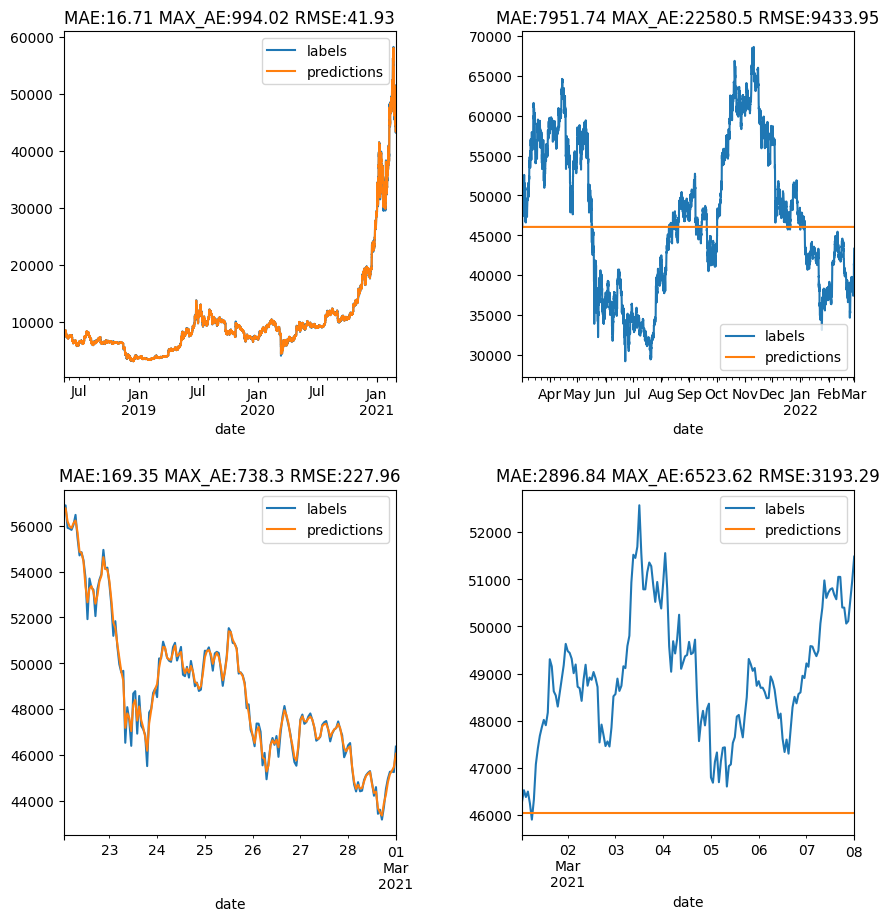

In [ ]:
[rf, train_features, train_labels, val_features, val_labels] = train_forest(df, 365*24)
check_predictions(rf, train_features, train_labels, val_features, val_labels)

In [ ]:
def train_forest(df, split_point):
  train_features = df.drop(['close'], axis = 1).head(len(df)-split_point)
  train_labels = df['close'].head(len(df)-split_point)
  val_features = df.drop(['close'], axis = 1).tail(split_point)
  val_labels = df['close'].tail(split_point)

  rf = RandomForestRegressor(n_estimators = 50, random_state = 42)
  rf.fit(train_features.drop('date', axis=1), train_labels)

  return [rf, train_features, train_labels, val_features, val_labels]

def predictions_plot(rf, features, labels, ax):
  predictions = rf.predict(features.drop('date', axis=1))
  errors = abs(predictions - labels)
  title='MAE:' + str(round(np.mean(errors), 2)) + \
        ' MAX_AE:' + str(round(np.max(abs(errors)), 2)) + \
        ' RMSE:' + str(round(np.sqrt(np.mean(np.square(errors))), 2))
  pd.DataFrame({'labels': labels,
                'predictions': predictions,
                'date': features['date']}).plot(title=title, ax=ax, x='date')

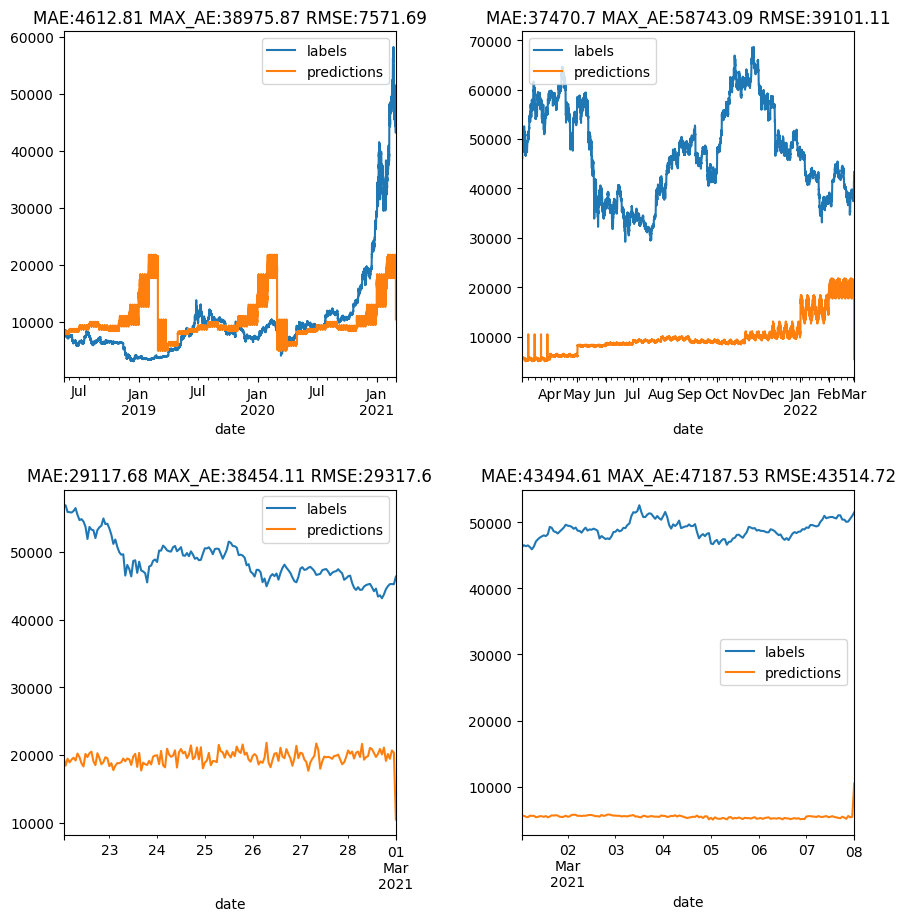

In [ ]:
df.insert(len(df.columns), 'hour', df['date'].dt.hour + df['date'].dt.minute/60)
df.insert(len(df.columns), 'weekday', df['date'].dt.weekday)
df.insert(len(df.columns), 'month', df['date'].dt.month)

[rf, train_features, train_labels, val_features, val_labels] = train_forest(df, 365*24)
check_predictions(rf, train_features, train_labels, val_features, val_labels)

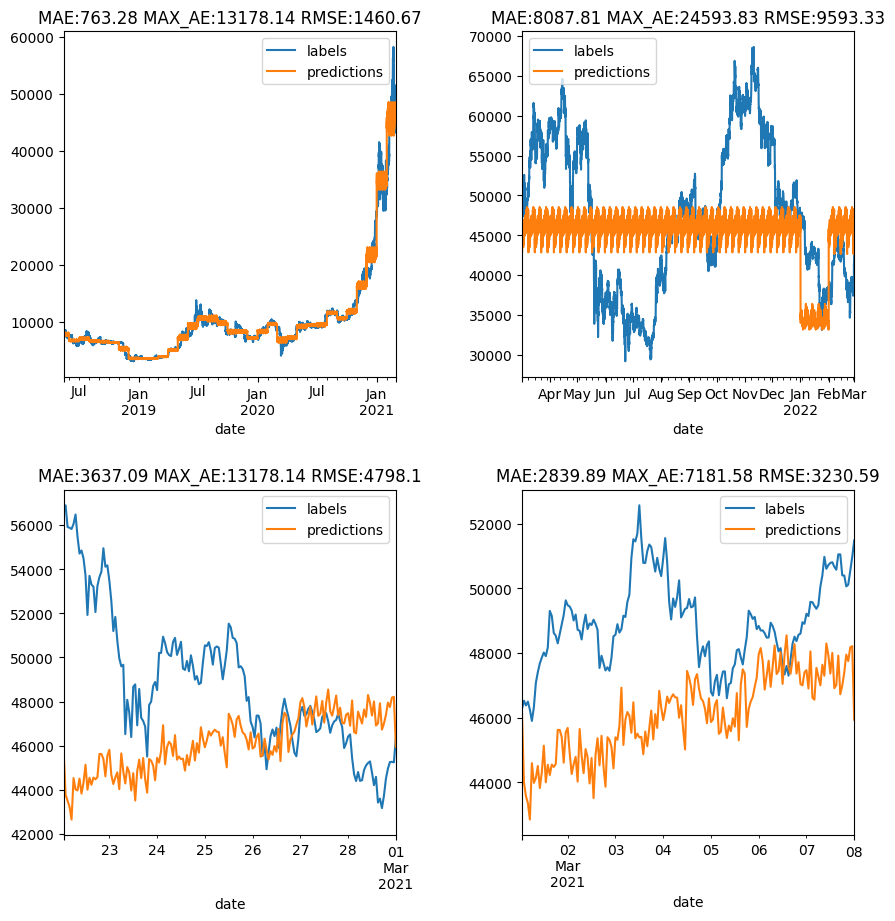

In [ ]:
df.insert(len(df.columns), 'year', df['date'].dt.year)

[rf, train_features, train_labels, val_features, val_labels] = train_forest(df, 365*24)
check_predictions(rf, train_features, train_labels, val_features, val_labels)

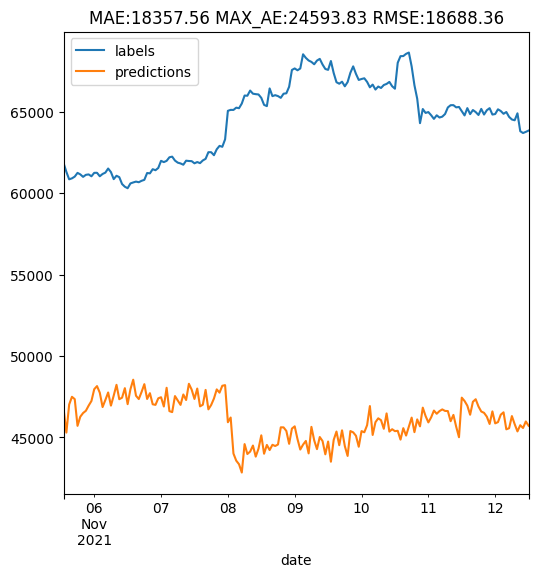

In [ ]:
abs_errors = abs(rf.predict(val_features.drop('date', axis=1)) - val_labels)
worst_index = abs_errors.tolist().index(max(abs_errors))
fig,axes  = plt.subplots(nrows=1, ncols=1, figsize=(6,6))
predictions_plot(rf, val_features.head(worst_index + 3*24).tail(7*24), val_labels.head(worst_index + 3*24).tail(7*24), axes)

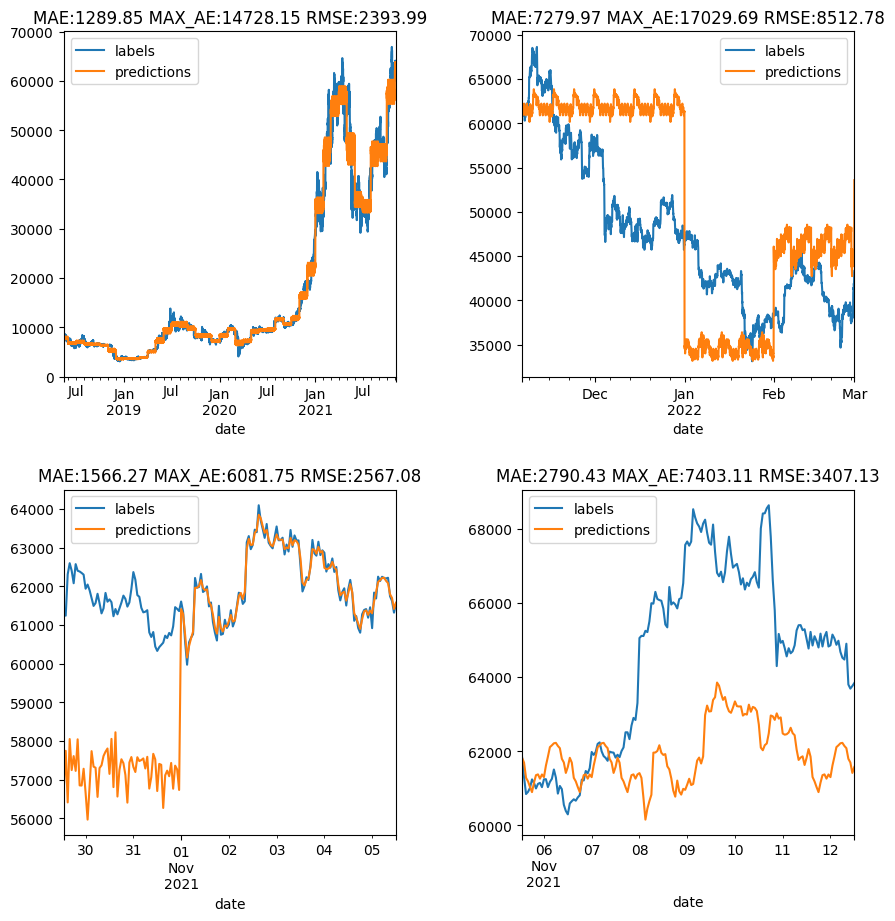

In [ ]:
[rf, train_features, train_labels, val_features, val_labels] = train_forest(df, 365*24 - worst_index + 4*24)
check_predictions(rf, train_features, train_labels, val_features, val_labels)